In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
np.random.seed(42)  # For reproducibility
house_sizes = np.random.uniform(500, 4000, 100)
house_prices = 150 + house_sizes * 0.8 + np.random.normal(0, 200, 100)

In [11]:
X = house_sizes.reshape(-1, 1)
y = house_prices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
base_estimator = DecisionTreeRegressor(max_depth=4)
ada_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
ada_regressor.fit(X_train, y_train)

C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  random_state=42)

In [15]:
y_pred = ada_regressor.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 30263.94937693158


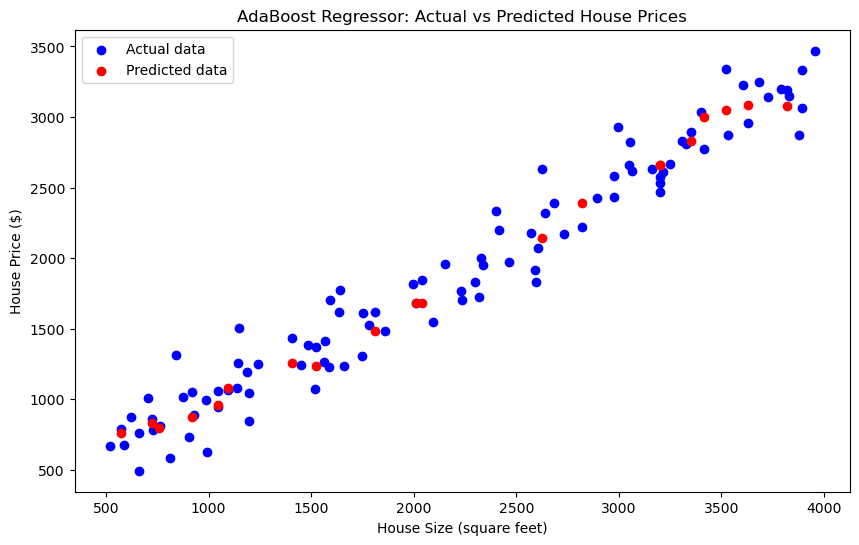

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predicted data')
plt.xlabel('House Size (square feet)')
plt.ylabel('House Price ($)')
plt.title('AdaBoost Regressor: Actual vs Predicted House Prices')
plt.legend()
plt.show()